# **Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Unzipping the dataset**

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/cardio_train.zip')
zip_ref.extractall('/content')

# **Importing dependencies**

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from math import ceil
import matplotlib.pyplot as plt

# **Data Preprocessing**

In [ ]:
# Load the dataset
file_path = '/content/cardio_train.csv'
data = pd.read_csv(file_path, delimiter=';')

# Convert age from days to years
data['age'] = (data['age'] // 365.25).astype(int)

# Convert categorical data to appropriate formats
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
data[categorical_features] = data[categorical_features].astype('category')

# Normalize/standardize numerical features
numerical_features = ['height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the updated data types and the first few rows of the processed data
print(data.dtypes)

id                int64
age               int64
gender         category
height          float64
weight          float64
ap_hi           float64
ap_lo           float64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio            int64
dtype: object


# **Dataset Sample**

In [ ]:
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,1,55,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,2,51,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,3,48,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,4,47,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0
5,8,59,1,-1.627176,-0.500546,-0.057251,-0.088238,2,2,0,0,0,0
6,9,60,1,-0.896366,1.305554,0.007679,-0.088238,3,1,0,0,1,0
7,12,61,2,1.661469,1.444485,0.007679,-0.035180,3,3,0,0,1,1
8,13,48,1,-0.774565,-0.222685,-0.122182,-0.141297,1,1,0,0,1,0
9,14,54,1,-0.043755,-0.431081,-0.122182,-0.194356,1,1,0,0,0,0


# **Histogram Chart**

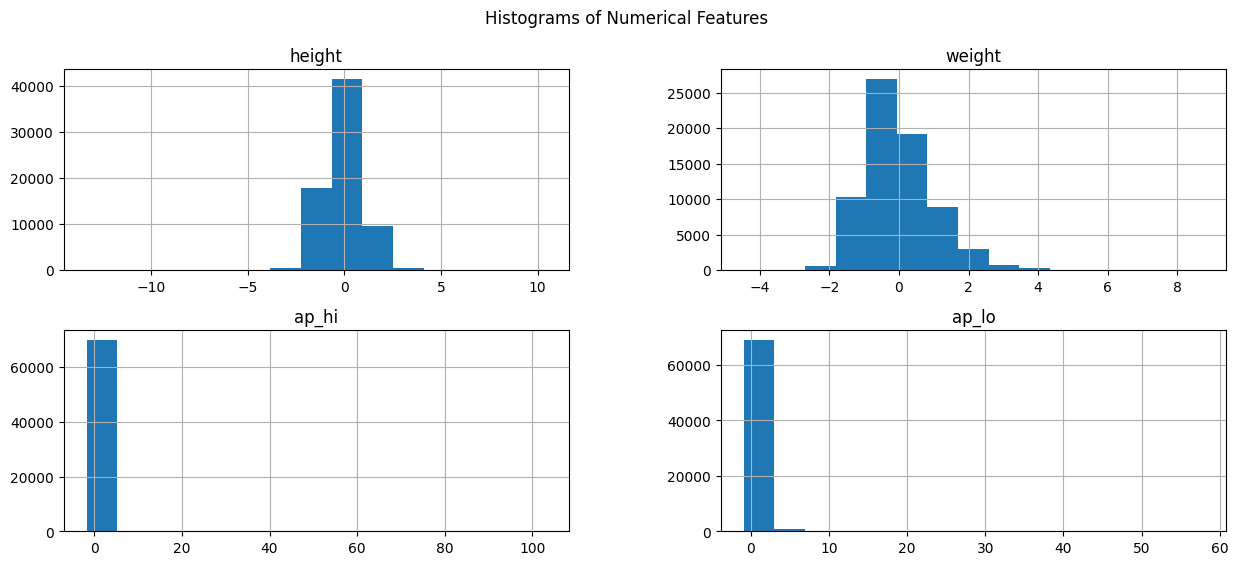

In [ ]:
# Plotting histograms for numerical features
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# **Count Plots**

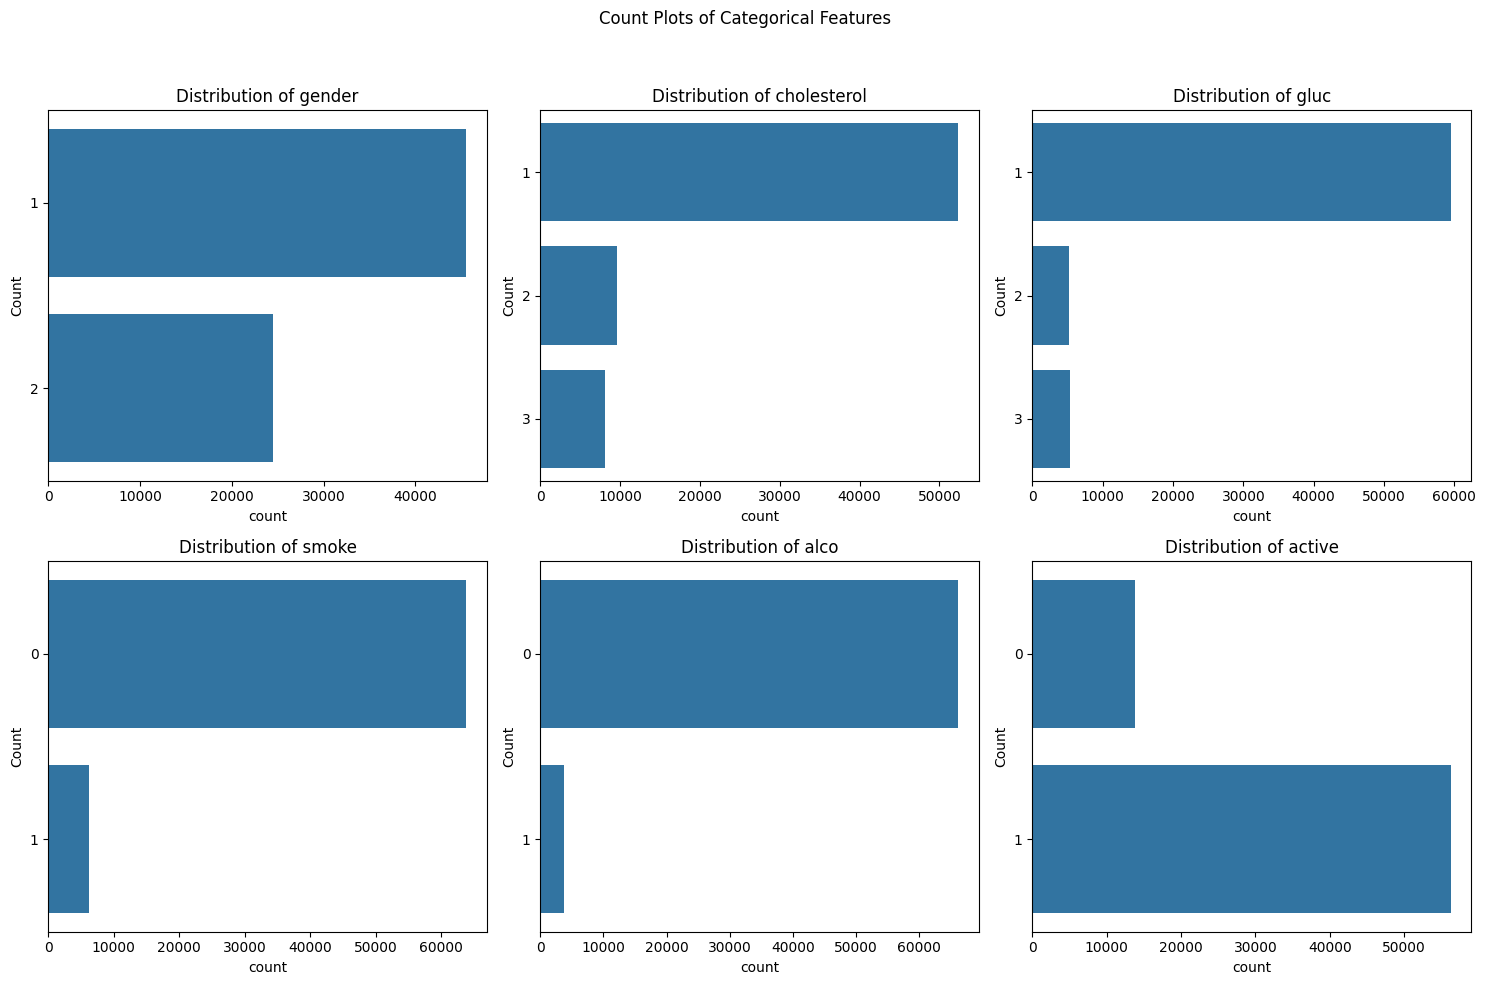

In [ ]:
# Plotting count plots for categorical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Count Plots of Categorical Features')
for feature, ax in zip(categorical_features, axes.flatten()):
    sns.countplot(data[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Correlation Matrix**

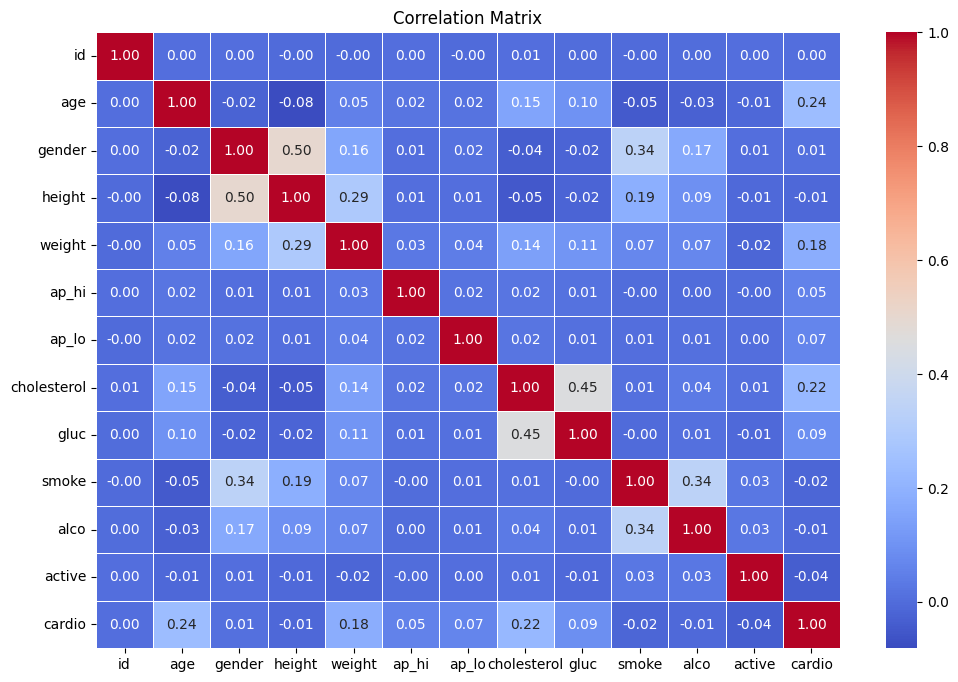

In [ ]:
# Plotting the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Training and Testing Split**

In [ ]:
# Splitting the data into training and testing sets
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training using various Machine Learning models**

In [17]:
# Machine Learning Models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Training and evaluating models
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    print(f'Accuracy of {model_name}: {accuracy:.4f}')

# Display accuracy results
print('\nAccuracy results of different models:')
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name}: {accuracy:.4f}')

Accuracy of SVM: 0.6634
Accuracy of KNN: 0.6406
Accuracy of Decision Tree: 0.6347


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.7198
Accuracy of Random Forest: 0.7071

Accuracy results of different models:
SVM: 0.6634
KNN: 0.6406
Decision Tree: 0.6347
Logistic Regression: 0.7198
Random Forest: 0.7071


# **Output Analysis**

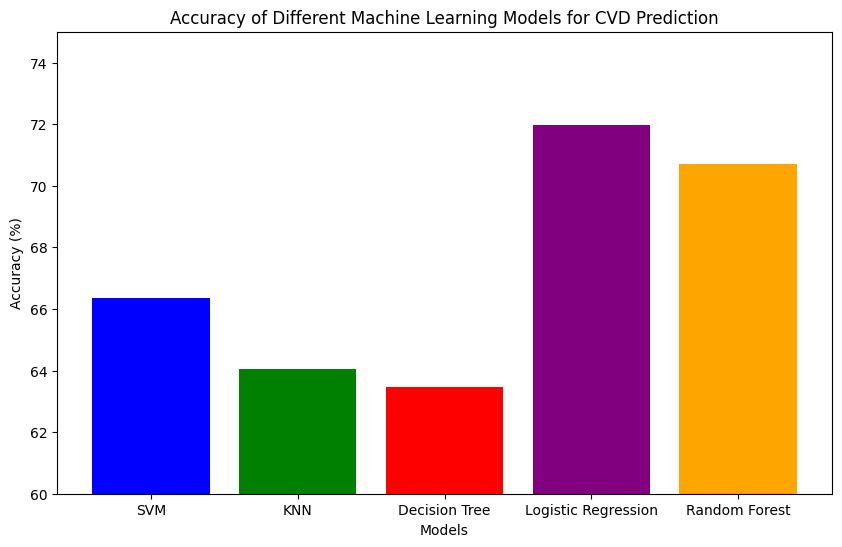

In [30]:
from math import ceil
import matplotlib.pyplot as plt
acc=[]
for model_name, accuracy in accuracy_results.items():
    acc.append(round(accuracy*100,2))

import matplotlib.pyplot as plt

# Model accuracies
accuracies = [66.34, 64.06, 63.47, 71.98, 70.71]
models = ['SVM', 'KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Machine Learning Models for CVD Prediction')
plt.ylim(60, 75)
plt.show()
